Given a bank customer, build a neural network-based classifier that can determine whether
they will leave or not in the next 6 months.
Dataset Description: The case study is from an open-source dataset from Kaggle.
The dataset contains 10,000 sample points with 14 distinct features such as
CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
Perform following steps:
1. Read the dataset.
2. Distinguish the feature and target set and divide the data set into training and test sets.
3. Normalize the train and test data.
4. Initialize and build the model. Identify the points of improvement and implement the same.
5. Print the accuracy score and confusion matrix (5 points)

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# Step 2: Data preprocessing
df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], inplace=True)

# Step 3: Prepare the feature set (X) and target set (y)
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

# Step 5: Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 9 (Optional): Try a different classifier (MLPClassifier from sklearn)
from sklearn.neural_network import MLPClassifier

nn_classifier = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', max_iter=300)
nn_classifier.fit(X_train, y_train)
y_pred2 = nn_classifier.predict(X_test)

# Evaluate the sklearn model
accuracy_sklearn = accuracy_score(y_test, y_pred2)
print("Sklearn Model Accuracy:", accuracy_sklearn)

# Display confusion matrix for sklearn model
cm_sklearn = confusion_matrix(y_test, y_pred2)
print(cm_sklearn)



Sklearn Model Accuracy: 0.8624
[[1963   59]
 [ 285  193]]


C:\Users\purva\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


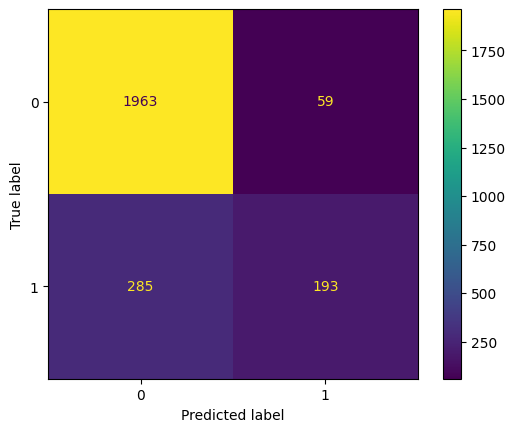

In [2]:

from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(cm_sklearn)
display.plot()

In [3]:
# Step 1: Specify the values for CreditScore and Age
input_credit_score = 700  # Replace with the desired Credit Score
input_age = 35            # Replace with the desired Age

# Step 2: Prepare the input data
# Create a DataFrame with the input values including all required features
input_data = pd.DataFrame({
    'CreditScore': [input_credit_score],
    'Age': [input_age],
    'Tenure': [1],          # Example value, can be adjusted
    'Balance': [5000],      # Example value, can be adjusted
    'NumOfProducts': [2],   # Example value, can be adjusted
    'HasCrCard': [1],       # Example value, can be adjusted
    'IsActiveMember': [1],   # Example value, can be adjusted
    #'EstimatedSalary': [50000]  # Example value, can be adjusted
})

# Step 3: Scale the input data using the previously fitted scaler
scaled_input = scaler.transform(input_data)

# Step 4: Make predictions using the trained model
prediction = nn_classifier.predict(scaled_input)

# Step 5: Output the prediction
if prediction[0] == 1:
    print("The customer is predicted to churn.")
else:
    print("The customer is predicted to stay.")


The customer is predicted to churn.


C:\Users\purva\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
